In [1]:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import os
import scanpy as sc
import mofax as mfx

from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

# initialise the entry point
ent = entry_point()

2023-06-03 10:04:36.616700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 10:04:37.183269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [2]:
current_path = globals()['_dh'][0]
out_file = current_path / ".." / ".." / "out" / "mofa_test.hdf5"
visium_path = current_path / ".." / ".." / "data" / "uscsc_dump"
visium_samples = [f for f in os.listdir(visium_path) if f.startswith("visium")]
visium_samples

['visium_MS197D.h5ad',
 'visium_MS94.h5ad',
 'visium_MS497I.h5ad',
 'visium_CO85.h5ad',
 'visium_MS377I.h5ad',
 'visium_MS466.h5ad',
 'visium_MS377T.h5ad',
 'visium_CO74.h5ad',
 'visium_MS411.h5ad',
 'visium_MS229.h5ad',
 'visium_MS197U.h5ad',
 'visium_CO40.h5ad',
 'visium_CO96.h5ad',
 'visium_MS371.h5ad',
 'visium_MS549H.h5ad',
 'visium_MS549T.h5ad',
 'visium_MS497T.h5ad']

In [3]:
celltypes = ["Astros", "Astros_c", "B-cells", "Endothelia", "Macrophages_f", "Microglia", "OPC", "Oligos", "Oligos_d", "Stroma", "T-cells"]
pathways = ["Androgen", "EGFR", "Estrogen", "Hypoxia", "JAK-STAT", "MAPK", "NFkB", "PI3K", "TGFb", "TNFa", "Trail", "VEGF", "WNT", "p53"]

In [4]:
df_list = []
for sample in visium_samples:
    base_name = sample.split(".")[0]
    base_name = base_name.replace("visium_", "")
    adata = sc.read_h5ad(visium_path / sample)
    adata.obs.index = [base_name + "_" + s for s in adata.obs.index] # unique barcodes are required!
    df_list.append(adata.obs)
meta_df = pd.concat(df_list)

In [5]:
df = meta_df.drop(columns=["in_tissue", "array_row", "array_col", "n_genes", "lesion_type", "leiden"])

df_A = df.loc[:, celltypes].reset_index().melt(id_vars="index", var_name="feature", value_name="value")
df_A = df_A.rename(columns={"index": "sample"})
df_A["view"] = "celltype"
df_A["group"] = df_A["sample"].apply(lambda x: x.split("_")[0])
df_A = df_A[["sample", "group", "feature", "value", "view"]]


df_B = df.loc[:, pathways].reset_index().melt(id_vars="index", var_name="feature", value_name="value")
df_B = df_B.rename(columns={"index": "sample"})
df_B["view"] = "pathway"
df_B["group"] = df_B["sample"].apply(lambda x: x.split("_")[0])
df_B = df_B[["sample", "group", "feature", "value", "view"]]
df_B

data_dt = pd.concat([df_A, df_B]).reset_index(drop=True)
data_dt

,sample,group,feature,value,view
0,MS197D_AAACACCAATAACTGC-1,MS197D,Astros,0.229216,celltype
1,MS197D_AAACAGCTTTCAGAAG-1,MS197D,Astros,0.369471,celltype
2,MS197D_AAACAGGGTCTATATT-1,MS197D,Astros,0.477619,celltype
3,MS197D_AAACAGTGTTCCTGGG-1,MS197D,Astros,0.088068,celltype
4,MS197D_AAACATTTCCCGGATT-1,MS197D,Astros,0.042253,celltype
...,...,...,...,...,...
1323620,MS497T_TTGTTTCACATCCAGG-1,MS497T,p53,1.119470,pathway
1323621,MS497T_TTGTTTCATTAGTCTA-1,MS497T,p53,-0.802435,pathway
1323622,MS497T_TTGTTTCCATACAACT-1,MS497T,p53,-0.779198,pathway
1323623,MS497T_TTGTTTGTATTACACG-1,MS497T,p53,-0.461565,pathway


In [6]:
# scale each view to unit variance?
ent.set_data_options(
    scale_views = True
)

Scaling views to unit variance...



In [7]:
# set the likelihoods
ent.set_data_df(data_dt, likelihoods = ["gaussian","gaussian"])



Loaded group='CO40' view='celltype' with N=4000 samples and D=11 features...
Loaded group='CO40' view='pathway' with N=4000 samples and D=14 features...
Loaded group='CO74' view='celltype' with N=3006 samples and D=11 features...
Loaded group='CO74' view='pathway' with N=3006 samples and D=14 features...
Loaded group='CO85' view='celltype' with N=3294 samples and D=11 features...
Loaded group='CO85' view='pathway' with N=3294 samples and D=14 features...
Loaded group='CO96' view='celltype' with N=2518 samples and D=11 features...
Loaded group='CO96' view='pathway' with N=2518 samples and D=14 features...
Loaded group='MS197D' view='celltype' with N=2616 samples and D=11 features...
Loaded group='MS197D' view='pathway' with N=2616 samples and D=14 features...
Loaded group='MS197U' view='celltype' with N=4076 samples and D=11 features...
Loaded group='MS197U' view='pathway' with N=4076 samples and D=14 features...
Loaded group='MS229' view='celltype' with N=2382 samples and D=11 featur

In [8]:
# set the model options
ent.set_model_options(
    factors = 10, 
    spikeslab_weights = True, 
    ard_weights = True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (celltype): gaussian
- View 1 (pathway): gaussian




In [9]:
# set the training options
ent.set_train_options(
    convergence_mode = "fast", 
    dropR2 = 0.001, 
    gpu_mode = True, 
    seed = 1
)


GPU mode is activated

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [10]:
ent.build()

In [11]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -9305192.26 

Iteration 1: time=1.45, ELBO=-1407340.88, deltaELBO=7897851.387 (84.87574639%), Factors=9
Iteration 2: time=0.25, ELBO=-1368854.72, deltaELBO=38486.154 (0.41359870%), Factors=9
Iteration 3: time=0.25, ELBO=-1355459.55, deltaELBO=13395.168 (0.14395369%), Factors=9
Iteration 4: time=0.25, ELBO=-1346233.47, deltaELBO=9226.087 (0.09914988%), Factors=9
Iteration 5: time=0.25, ELBO=-1338736.89, deltaELBO=7496.579 (0.08056340%), Factors=9
Iteration 6: time=0.25, ELBO=-1332217.57, deltaELBO=6519.323 (0.07006113%), Factors=9
Iteration 7: time=0.25, ELBO=-1326628.89, deltaELBO=5588.680 (0.06005980%), Factors=9
Iteration 8: time=0.25, ELBO=-1321762.72, deltaELBO=4866.166 (0.05229517%), Factors=9
Iteration 9: time=0.25, ELBO=-1317500.44, deltaELBO=4262.280 (0.04580540%), Factors=9
Iteration 10: time=0.25, ELBO=-1314005.93, deltaELBO=3494.513 (0.

In [12]:
ent.save(outfile=out_file)

Saving model in /home/philipp/Work/VisiumMS_old/scripts/process/../../out/mofa_test.hdf5...


In [13]:
model = mfx.mofa_model(out_file)
model

MOFA+ model: mofa test
Samples (cells): 52945
Features: 25
Groups: CO40 (4000), CO74 (3006), CO85 (3294), CO96 (2518), MS197D (2616), MS197U (4076), MS229 (2382), MS371 (3514), MS377I (2131), MS377T (3627), MS411 (2790), MS466 (3313), MS497I (4491), MS497T (4646), MS549H (1576), MS549T (2543), MS94 (2422)
Views: celltype (11), pathway (14)
Factors: 9
Expectations: W, Z

In [14]:
umap_coord = UMAP().fit_transform(model.get_factors())

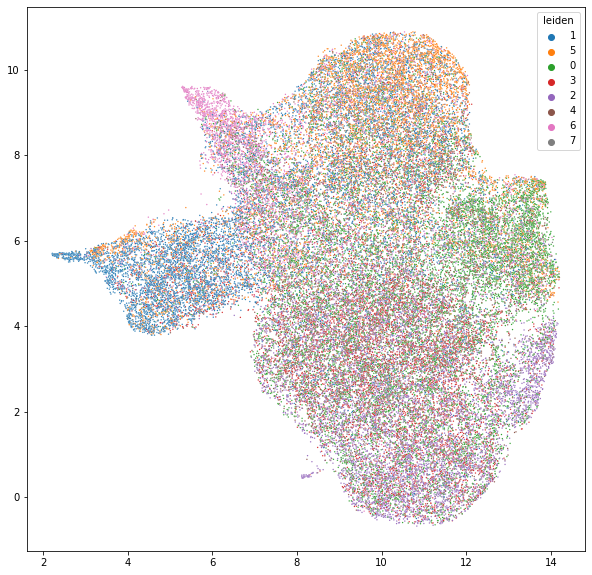

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=umap_coord[:, 0], y=umap_coord[:, 1], hue=meta_df.loc[model.get_cells().cell].leiden, s=2, alpha=1)
plt.show()

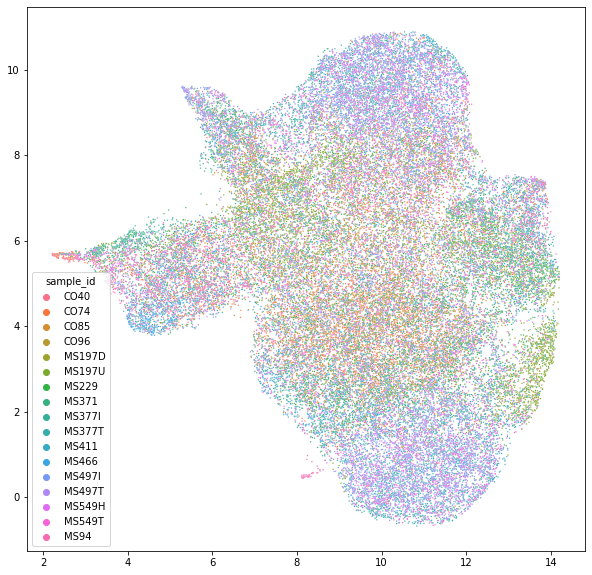

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=umap_coord[:, 0], y=umap_coord[:, 1], hue=meta_df.loc[model.get_cells().cell].sample_id, s=2, alpha=1)
plt.show()

In [17]:
model.get_factors().shape

(52945, 9)

In [18]:
model.get_r2()

,Factor,View,Group,R2
0,Factor1,celltype,CO40,7.249353e+01
1,Factor1,pathway,CO40,1.063609e+00
2,Factor2,celltype,CO40,2.856251e-01
3,Factor2,pathway,CO40,8.814788e+00
4,Factor3,celltype,CO40,2.018514e-01
...,...,...,...,...
13,Factor7,pathway,MS94,2.530347e+00
14,Factor8,celltype,MS94,1.629922e-01
15,Factor8,pathway,MS94,6.898506e-01
16,Factor9,celltype,MS94,1.268371e-07


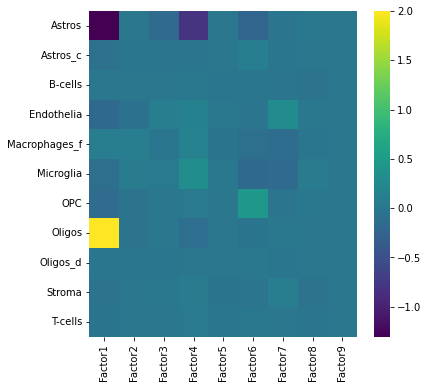

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(model.get_weights(df=True).loc[celltypes, :], ax=ax, cmap="viridis")
plt.show()

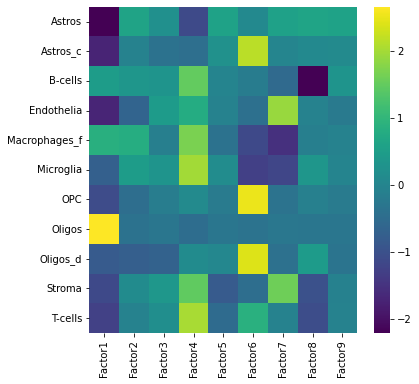

In [20]:
# same heatmap as above but standardize each column (subtract mean and divide by std)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
df = model.get_weights(df=True).loc[celltypes, :]
df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
sns.heatmap(df, ax=ax, cmap="viridis")
plt.show()

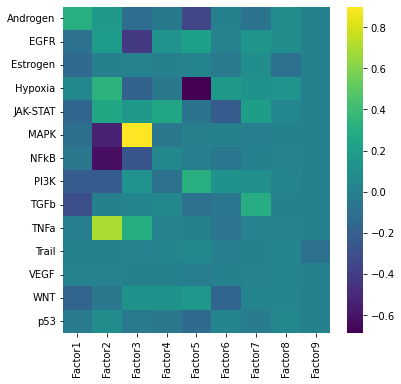

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.heatmap(model.get_weights(df=True).loc[pathways, :], ax=ax, cmap="viridis")
plt.show()

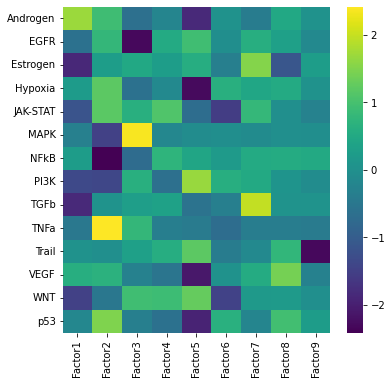

In [22]:
# same heatmap as above but standardize each column (subtract mean and divide by std)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
df = model.get_weights(df=True).loc[pathways, :]
df = df.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
sns.heatmap(df, ax=ax, cmap="viridis")
plt.show()